In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline

In [2]:
#https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/
url = 'http://bit.ly/gta-mlnd-capstone'
df = pd.read_csv(url)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

#By setting errors to 'coerce' a 'NaN will be inserted when there is an error.
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html

In [7]:
df['MonthlyCharges'].isnull().sum()

0

In [8]:
df['TotalCharges'].isnull().sum()

11

In [9]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
index_row = []
for index, row in df.iterrows():
    try:
        if pd.isnull(row['TotalCharges']):
            df.set_value(index, 'TotalCharges', row['MonthlyCharges'])
            print(index)
    except:
        index_row.append(row)

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [11]:
len(index_row)

0

In [12]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [14]:
df[df['tenure'] == 1].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


In [15]:
df['ratio'] = df['TotalCharges'] / df['MonthlyCharges']

In [16]:
df_1 = df[df['tenure'] == 1]
df_1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ratio
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.0
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1.0
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1.0
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,1.0
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No,1.0
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No,1.0
70,2273-QCKXA,Male,0,No,No,1,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,No,Mailed check,49.05,49.05,No,1.0
80,5919-TMRGD,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes,1.0
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No,1.0
100,6380-ARCEH,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No,1.0


In [17]:
df[df['tenure'] == 2].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ratio
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008357
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144979
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,1.902094


In [18]:
df.iloc[4]['MonthlyCharges'] * df.iloc[4]['tenure'] 

141.40000000000001

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ratio
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992,32.374993
std,0.368612,24.559481,30.090047,2266.730170,24.593918
min,0.000000,0.000000,18.250000,18.800000,1.000000
25%,0.000000,9.000000,35.500000,398.550000,8.717230
50%,0.000000,29.000000,70.350000,1394.550000,28.673115
75%,0.000000,55.000000,89.850000,3786.600000,55.244460
max,1.000000,72.000000,118.750000,8684.800000,79.341772


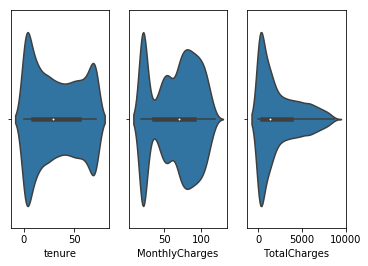

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False)
sns.violinplot(x=df['tenure'], ax=ax1)
sns.violinplot(x=df['MonthlyCharges'], ax=ax2)
sns.violinplot(x=df['TotalCharges'], ax=ax3)

In [21]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [22]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [23]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

### Outlier Analysis

In [24]:
Q1 = np.percentile(df['MonthlyCharges'], 25)
Q3 = np.percentile(df['MonthlyCharges'], 75)

step = 1.5 * (Q3 - Q1)
    
print('25%: {}'.format(Q1))
print('75%: {}'.format(Q3))
print("1.5 * IQR: {}" .format(step))

print(Q1 - step)
print(Q3 + step)
print(df['MonthlyCharges'].max())
print(df['TotalCharges'].min())

25%: 35.5
75%: 89.85
1.5 * IQR: 81.52499999999999
-46.025
171.375
118.75
18.8


In [25]:
Q1 = np.percentile(df['TotalCharges'], 25)
Q3 = np.percentile(df['TotalCharges'], 75)

step = 1.5 * (Q3 - Q1)
    
print('25%: {}'.format(Q1))
print('75%: {}'.format(Q3))
print("1.5 * IQR: {}" .format(step))

print(Q1 - step)
print(Q3 + step)
print(df['TotalCharges'].max())
print(df['TotalCharges'].min())

25%: 398.55
75%: 3786.6
1.5 * IQR: 5082.075
-4683.525
8868.675
8684.8
18.8


### Tukey Fences

There are several methods for determining outliers in a sample. A very popular method is based on the following:

Outliers are values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1) or equivalently, values below Q1-1.5 IQR or above Q3+1.5 IQR.

These are referred to as Tukey fences.6  For the diastolic blood pressures, the lower limit is 64 - 1.5(77-64) = 44.5 and the upper limit is 77 + 1.5(77-64) = 96.5.  The diastolic blood pressures range from 62 to 81. Therefore there are no outliers.  The best summary of a typical diastolic blood pressure is the mean (in this case 71.3) and the best summary of variability is given by the standard deviation (s=7.2).

http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata7.html

In [26]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'ratio']

In [27]:
features = df[[
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']]

In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
Partner             7043 non-null object
Dependents          7043 non-null object
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
dtypes: object(14)
memory usage: 770.4+ KB


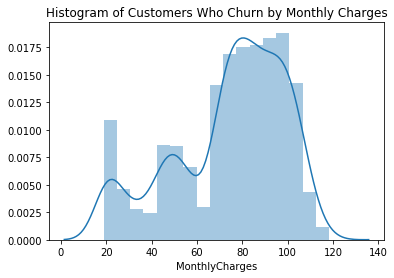

In [29]:
sns.distplot(df[df['Churn'] == 'Yes']['MonthlyCharges'])
plt.title('Histogram of Customers Who Churn by Monthly Charges')
plt.show()

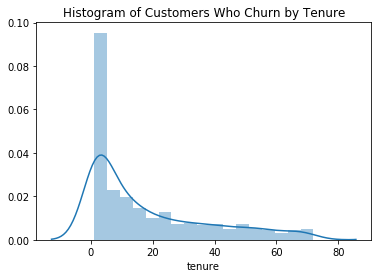

In [30]:
sns.distplot(df[df['Churn'] == 'Yes']['tenure'])
plt.title('Histogram of Customers Who Churn by Tenure')
plt.show()

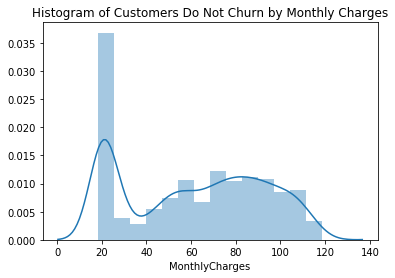

In [31]:
sns.distplot(df[df['Churn'] == 'No']['MonthlyCharges'])
plt.title('Histogram of Customers Do Not Churn by Monthly Charges')
plt.show()

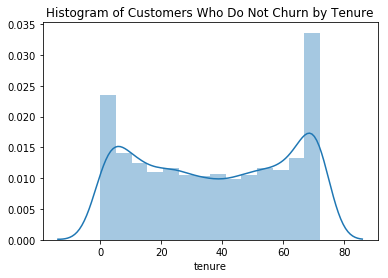

In [32]:
sns.distplot(df[df['Churn'] == 'No']['tenure'])
plt.title('Histogram of Customers Who Do Not Churn by Tenure')
plt.show()

In [33]:
#https://blog.myyellowroad.com/using-categorical-data-in-machine-learning-with-python-from-dummy-variables-to-deep-category-66041f734512

In [34]:
columns_list = df.columns.tolist()
columns_list
columns_list

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'ratio']

In [35]:
sub_index = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
sub_list = [columns_list[x] for x in sub_index]

In [36]:
unique_ = []
for i in sub_list:
    unique_.append(df[i].unique())
type(unique_)

list

In [37]:
df_col_summary = pd.DataFrame({'Column_Header' : sub_list, 'Initial_Index': sub_index, 'Unique_Fields' : unique_})   
df_col_summary

,Column_Header,Initial_Index,Unique_Fields
0,gender,1,"[Female, Male]"
1,SeniorCitizen,2,"[0, 1]"
2,Partner,3,"[Yes, No]"
3,Dependents,4,"[No, Yes]"
4,PhoneService,6,"[No, Yes]"
5,MultipleLines,7,"[No phone service, No, Yes]"
6,InternetService,8,"[DSL, Fiber optic, No]"
7,OnlineSecurity,9,"[No, Yes, No internet service]"
8,OnlineBackup,10,"[Yes, No, No internet service]"
9,DeviceProtection,11,"[No, Yes, No internet service]"


In [38]:
df_col_summary.iloc[15]['Unique_Fields'].tolist()

['Electronic check',
 'Mailed check',
 'Bank transfer (automatic)',
 'Credit card (automatic)']

In [39]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
df['InternetService'] = df['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['TechSupport'] = df['TechSupport'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ratio
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,29.85,29.85,0,1.000000
1,5575-GNVDE,0,0,0,0,34,1,1,0,2,...,1,1,1,1,0,1,56.95,1889.50,0,33.178227
2,3668-QPYBK,0,0,0,0,2,1,1,0,2,...,1,1,1,0,1,1,53.85,108.15,1,2.008357
3,7795-CFOCW,0,0,0,0,45,0,0,0,2,...,2,1,1,1,0,2,42.30,1840.75,0,43.516548
4,9237-HQITU,1,0,0,0,2,1,1,1,1,...,1,1,1,0,1,0,70.70,151.65,1,2.144979


In [41]:
df_vect = df.drop(['customerID', 'ratio', 'MonthlyCharges'], axis=1)

In [42]:
df_vect.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,1,2,1,1,1,1,0,1,0,29.85,0
1,0,0,0,0,34,1,1,0,2,1,2,1,1,1,1,0,1,1889.50,0
2,0,0,0,0,2,1,1,0,2,2,1,1,1,1,0,1,1,108.15,1
3,0,0,0,0,45,0,0,0,2,1,2,2,1,1,1,0,2,1840.75,0
4,1,0,0,0,2,1,1,1,1,1,1,1,1,1,0,1,0,151.65,1


In [43]:
df_vect.shape

(7043, 19)

In [44]:
#https://chrisalbon.com/machine_learning/model_evaluation/split_data_into_training_and_test_sets/
#Tl;dr: Split the data set using train_test_split first then apply standard scaler. 

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df_vect.drop('Churn', axis=1)
y = df_vect['Churn']

/Users/gta/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [48]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (4718, 18)
Shape of X_test: (2325, 18)
Shape of y_train: (4718,)
Shape of y_test: (2325,)


In [49]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_class = lr.predict(X_test)
lr.score(X_train, y_train)

0.78952946163628657

In [50]:
confusion_matrix(y_test, y_pred_class)

array([[1544,  153],
       [ 295,  333]])

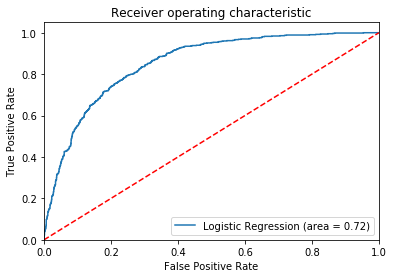

In [51]:
lr_roc_auc = roc_auc_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

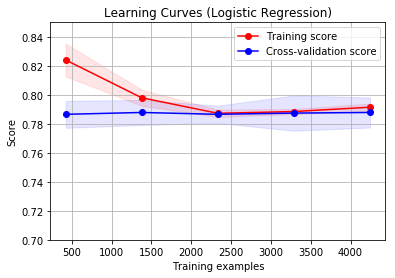

In [52]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=10)

plt.title("Learning Curves (Logistic Regression)")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="b")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="b", 
         label="Cross-validation score")

plt.ylim([0.7, 0.85])
plt.legend(loc="best")
plt.show()

In [53]:
#http://scikit-learn.org/0.15/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score
scores = cross_val_score(lr, X, y)
scores.mean()

0.79525809767903588

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.25, random_state=42)

In [55]:
for train_idx, test_idx in sss.split(X, y):
    #https://stackoverflow.com/questions/51852551/key-error-not-in-index-while-cross-validation
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [56]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [183]:
X_std = scaler.transform(X)

In [57]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (5282, 18)
Shape of X_test: (1761, 18)
Shape of y_train: (5282,)
Shape of y_test: (1761,)


In [58]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_class = lr.predict(X_test)
lr.score(X_train, y_train)

0.79912911775842488

In [59]:
confusion_matrix(y_test, y_pred_class)

array([[1177,  117],
       [ 244,  223]])

In [60]:
lr = LogisticRegression(random_state = 42)
penalty = ['l1', 'l2']
C = np.logspace(0, 1, 10, 100)
hyperparameters = dict(C=C, penalty=penalty)
grid = GridSearchCV(lr, hyperparameters, verbose=3, cv=10)

In [61]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.8166351606805293, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ....... C=1.0, penalty=l1, score=0.780718336483932, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.8238636363636364, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...... C=1.0, penalty=l1, score=0.8143939393939394, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7954545454545454, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.8049242424242424, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7992424242424242, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7632575757575758, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7727272727272727, total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.8106060606060606, total=   0.1s
[CV] C=1.0, penalty=l2 ...............................................
[CV] .

[CV]  C=2.15443469003, penalty=l1, score=0.8238636363636364, total=   0.1s
[CV] C=2.15443469003, penalty=l1 .....................................
[CV]  C=2.15443469003, penalty=l1, score=0.8143939393939394, total=   0.1s
[CV] C=2.15443469003, penalty=l1 .....................................
[CV]  C=2.15443469003, penalty=l1, score=0.7954545454545454, total=   0.0s
[CV] C=2.15443469003, penalty=l1 .....................................
[CV]  C=2.15443469003, penalty=l1, score=0.8049242424242424, total=   0.1s
[CV] C=2.15443469003, penalty=l1 .....................................
[CV]  C=2.15443469003, penalty=l1, score=0.803030303030303, total=   0.1s
[CV] C=2.15443469003, penalty=l1 .....................................
[CV]  C=2.15443469003, penalty=l1, score=0.7651515151515151, total=   0.0s
[CV] C=2.15443469003, penalty=l1 .....................................
[CV]  C=2.15443469003, penalty=l1, score=0.7708333333333334, total=   0.1s
[CV] C=2.15443469003, penalty=l1 .................

[CV]  C=4.64158883361, penalty=l1, score=0.8238636363636364, total=   0.0s
[CV] C=4.64158883361, penalty=l1 .....................................
[CV]  C=4.64158883361, penalty=l1, score=0.8143939393939394, total=   0.0s
[CV] C=4.64158883361, penalty=l1 .....................................
[CV]  C=4.64158883361, penalty=l1, score=0.7954545454545454, total=   0.0s
[CV] C=4.64158883361, penalty=l1 .....................................
[CV]  C=4.64158883361, penalty=l1, score=0.8049242424242424, total=   0.1s
[CV] C=4.64158883361, penalty=l1 .....................................
[CV]  C=4.64158883361, penalty=l1, score=0.803030303030303, total=   0.1s
[CV] C=4.64158883361, penalty=l1 .....................................
[CV]  C=4.64158883361, penalty=l1, score=0.7651515151515151, total=   0.1s
[CV] C=4.64158883361, penalty=l1 .....................................
[CV]  C=4.64158883361, penalty=l1, score=0.7708333333333334, total=   0.1s
[CV] C=4.64158883361, penalty=l1 .................

[CV] ..... C=10.0, penalty=l1, score=0.8166351606805293, total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ...... C=10.0, penalty=l1, score=0.780718336483932, total=   0.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8238636363636364, total=   0.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8143939393939394, total=   0.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.7954545454545454, total=   0.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8049242424242424, total=   0.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ...... C=10.0, penalty=l1, score=0.803030303030303, total=   0.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.3s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.     ,   1.29155,   1.6681 ,   2.15443,   2.78256,   3.59381,
         4.64159,   5.99484,   7.74264,  10.     ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [62]:
print(grid.best_params_)

{'C': 2.1544346900318838, 'penalty': 'l1'}


In [63]:
print(grid.best_score_)

0.799129117758


In [64]:
y_pred_class = grid.predict(X_test)

print(classification_report(y_test, y_pred_class,
                            target_names=["No", "Yes"]))

             precision    recall  f1-score   support

         No       0.83      0.91      0.87      1294
        Yes       0.65      0.47      0.54       467

avg / total       0.78      0.79      0.78      1761



In [65]:
lr = LogisticRegression(random_state=42, C=2.1544346900318838, penalty='l1')
lr.fit(X_train, y_train)
y_pred_class = lr.predict(X_test)
lr.score(X_train, y_train)

0.80121166224914808

In [66]:
confusion_matrix(y_test, y_pred_class)

array([[1176,  118],
       [ 248,  219]])

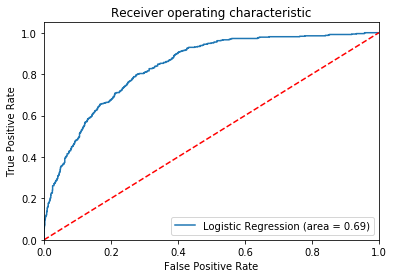

In [67]:
lr_roc_auc = roc_auc_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

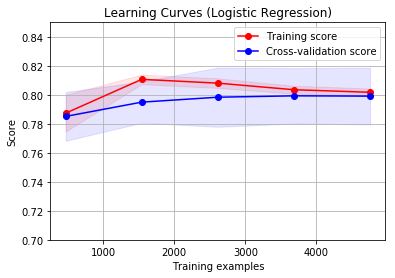

In [68]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=10)

plt.title("Learning Curves (Logistic Regression)")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="b")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="b", 
         label="Cross-validation score")

plt.ylim([0.7, 0.85])
plt.legend(loc="best")
plt.show()

In [69]:
from sklearn.svm import SVC 
model = SVC()

model.fit(X_train, y_train)
y_pred_class = model.predict(X_test)
model.score(X_train, y_train)

0.91158652025747822

In [70]:
import time
start = time.time()

model = SVC(probability=True)
model.fit(X_train, y_train)
y_pred_class = model.predict(X_test)
print("The Model Score is: {}".format(model.score(X_train, y_train)))

end = time.time()
print('Elapsed time: {}'.format(end-start))

The Model Score is: 0.9115865202574782
Elapsed time: 5.995639085769653


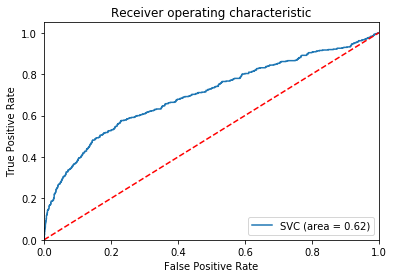

In [71]:
svm_roc_auc  = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

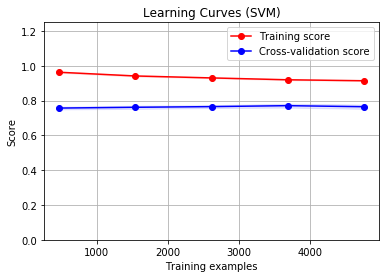

In [72]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.title("Learning Curves (SVM)")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="b")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="b", 
         label="Cross-validation score")

plt.ylim([0.0, 1.25])
plt.legend(loc="best")
plt.show()

In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
#https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
#https://github.com/dmlc/xgboost/tree/master/demo/guide-python

In [74]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [75]:
y_pred_prob = xgb_model.predict(X_test)
y_pred_class = [round(each) for each in y_pred_prob]

In [76]:
accuracy = accuracy_score(y_test, y_pred_class)
accuracy

0.80522430437251558

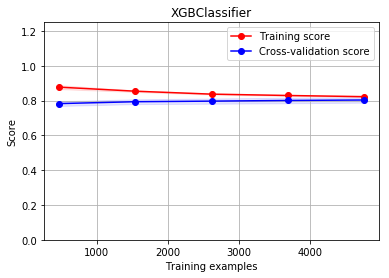

In [77]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=10)

plt.title("XGBClassifier")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="b")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="b", 
         label="Cross-validation score")

plt.ylim([0.0, 1.25])
plt.legend(loc="best")
plt.show()

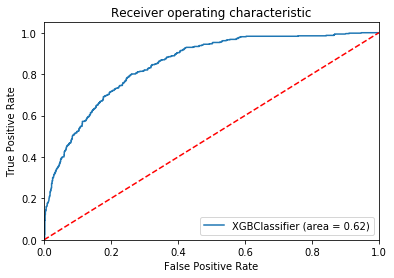

In [78]:
xgb_roc_auc  = roc_auc_score(y_test, xgb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='XGBClassifier (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [136]:
from sklearn.decomposition import PCA

In [192]:
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(X_std)
print('Size of Feature Vector is: ', len(X_std[0]))

Size of Feature Vector is:  18


In [193]:
pca.explained_variance_ratio_

array([ 0.32489574,  0.15427629])

In [194]:
X_std.shape

(7043, 18)

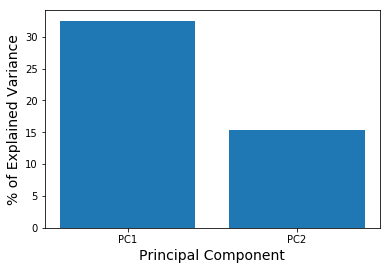

In [195]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('% of Explained Variance', fontsize = 14)
plt.show()

In [198]:
pca_df = pd.DataFrame(pca_results, columns=['x', 'y'])
pca_df.head()

,x,y
0,-0.162031,-2.925970
1,-0.647812,-0.649181
2,-0.427366,-2.315031
3,-1.347052,-1.338860
4,0.962342,-2.114847


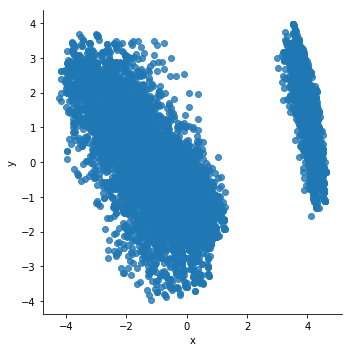

In [210]:
plt.figure()
sns.lmplot(x="x", y="y", data=pca_df, fit_reg=False, legend=False)
plt.legend(loc='lower right')
plt.show()

In [153]:
sum(pca.explained_variance_ratio_[0:7])

0.76136374700386367

In [199]:
len(pca.components_)

2

In [200]:
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ratio'],
      dtype='object')

In [165]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [168]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute
    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

In [205]:
pca_results(X_std, pca)

TypeError: 'numpy.ndarray' object is not callable